In [1]:
import numpy as np, tensorflow as tf
from matplotlib import pyplot
from tensorflow.python.keras import layers as L, models as M
from model import model

S = 96

m = model(60, 3755)
m.summary()
m.compile(
optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
m.load_weights("./4.h5")


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 16, 16, 32)   1312        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4, 4, 64)     51520       sequential[0][0]                 
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 2, 2, 128)    205440      sequential_1[0][0]               
______________________________________________________________________________________________

In [24]:
from skimage import color
def pred_fn(images):
    pred = np.array([255-color.rgb2gray(img) for img in images])
    return m.predict(pred)[0]

25 0.0
26 0.0
14 0.0
59 0.0
51 1.0


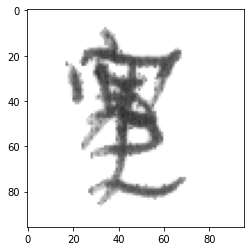

In [46]:
import cv2
img = cv2.imread("./log/0.png")
plt.imshow(img)
preds = pred_fn(np.array([img]))
for x in preds.argsort()[0][-5:]:
    print(x, preds[0,x])

100%|██████████| 1000/1000 [00:04<00:00, 231.74it/s]


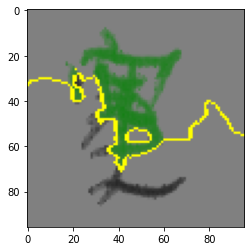

In [49]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
temp, mask = explanation.get_image_and_mask(51, positive_only=False, num_features=5, hide_rest=False)
boundaries = mark_boundaries(temp / 2 + 0.5, mask, color=(255, 255, 0))
cv2.imwrite("./log/0_exp.png", boundaries)
plt.imshow(np.array(boundaries, dtype=np.uint8))

In [59]:
import cv2
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
for i in range(8):
    img = cv2.imread("./log/%d.png"%i)
    preds = pred_fn(np.array([img]))
    x = preds.argsort()[0][-1]
    explanation = explainer.explain_instance(img, pred_fn, top_labels=5, hide_color=255, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(x, positive_only=False, num_features=5, hide_rest=False)
    boundaries = mark_boundaries(temp / 2 + 0.5, mask, color=(0, 255, 255))
    cv2.imwrite("./log/%d_exp.png"%i, boundaries)

100%|██████████| 1000/1000 [00:04<00:00, 239.20it/s]
